In [8]:

# # ANN classification

# In[45]:


import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from keras import optimizers
from sklearn.model_selection import train_test_split
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score


# ## Load the data

# In[46]:


# Load the dataset from scikit's data sets
loaddata = datasets.load_breast_cancer()
X, y = loaddata.data, loaddata.target

X = pd.DataFrame(loaddata.data, columns=loaddata.feature_names)
y = pd.DataFrame(loaddata.target)

#preview
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


              Specs          Score
23       worst area  112598.431564
3         mean area   53991.655924
13       area error    8758.504705
22  worst perimeter    3665.035416
2    mean perimeter    2011.102864
20     worst radius     491.689157
0       mean radius     266.104917
12  perimeter error     250.571896
21    worst texture     174.449400
1      mean texture      93.897508
Epoch 1/200
25/25 [==============================] - 1s 14ms/step - loss: 0.7557 - accuracy: 0.4332 - val_loss: 0.1720 - val_accuracy: 0.7377
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.7449 - val_loss: 0.1351 - val_accuracy: 0.8115
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.8866 - val_loss: 0.1260 - val_accuracy: 0.8607
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9109 - val_loss: 0.1160 - val_accuracy: 0.8525
Epoch 5/200
25/25 [==============================]

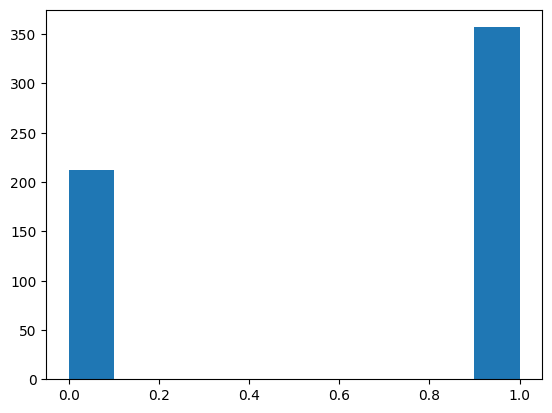

In [4]:



# In[22]:


#feature scoring
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


# In[23]:


counts, bins = np.histogram(y)
plt.hist(bins[:-1], bins, weights=counts)


# In[27]:


# Split the data up in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)


# ## Training the model

# In[36]:


# Initialize the NN
model = Sequential()

# Add input layer
model.add(Dense(64,  input_shape=(30,), activation='sigmoid'))

# Add output layer
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

#train the model
history=model.fit(X_train, y_train,validation_split=0.33,epochs=200, batch_size=10, verbose=1)


# In[38]:


model.summary()


7/7 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9350
[0.06338108330965042, 0.9350000023841858]
max:  1.4250377 min:  -1.2785225
max:  0.2617543 min:  -0.2626138
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


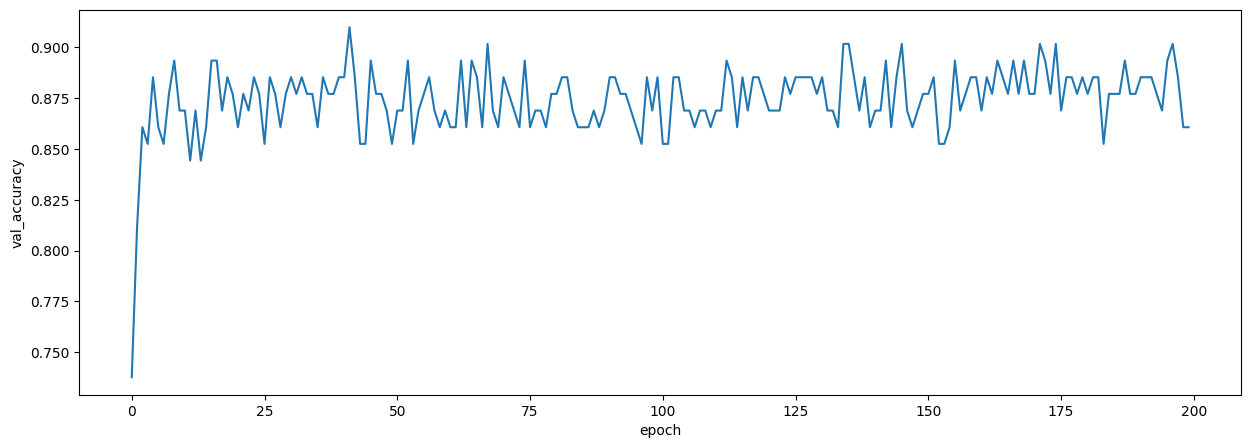

In [5]:




# ## Evaluating the model

# In[39]:


#evaluate the model
score = model.evaluate(X_test, y_test)
print(score)


# In[40]:


#weights
weights=model.layers[0].get_weights()[0]
weights.shape
print("max: ",weights.max() ,"min: ",weights.min())


# In[41]:


#bias
bias=model.layers[0].get_weights()[1]
bias.shape
print("max: ",bias.max() ,"min: ",bias.min())


# In[42]:


#plot the val_accuracy over epochs
print(history.history.keys())
plt.figure(figsize=(15,5))
plt.plot(history.history['val_accuracy'])

plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()




In [6]:
# ## Prediction

# Make predictions on the test set
y_pred = model.predict(X_test)
# Convert predictions to binary outcomes
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Prediction Accuracy: {accuracy:.2f}')

# Show some example predictions
for i in range(5):
    print(f'Actual: {y_test.iloc[i].values[0]}, Predicted: {y_pred_binary[i][0]}')

7/7 [==============================] - 0s 3ms/step
Prediction Accuracy: 0.94
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
